In [1]:
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from pandas import read_csv
from matplotlib import pyplot
from sklearn.feature_selection import VarianceThreshold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("music_genre.csv")
df.head(50000)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.004680,0.652,-1.0,0.941,0.792000,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.012700,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.025400,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.004650,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,56911.0,Too $hort,Shake That Monkey,55.0,0.000577,0.937,278707.0,0.695,0.000032,C,0.295,-6.932,Major,0.1340,99.99700000000001,4-Apr,0.457,Hip-Hop
49996,20269.0,Unknown Mortal Orchestra,So Good at Being in Trouble,57.0,0.036300,0.829,230147.0,0.435,0.878000,C,0.119,-10.136,Major,0.0515,103.816,4-Apr,0.594,Hip-Hop
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.171000,0.587,254694.0,0.711,0.000000,C#,0.125,-6.330,Major,0.4200,98.008,4-Apr,0.381,Hip-Hop
49998,64552.0,Logic,Growing Pains III,55.0,0.474000,0.514,246773.0,0.730,0.000000,E,0.511,-8.491,Minor,0.3870,167.655,4-Apr,0.699,Hip-Hop


In [3]:
print(df.describe())
print(df.shape)

        instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0

In [4]:
# drop na values
df = df.dropna()
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [5]:
print(df.shape)

(50000, 18)


In [6]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


<AxesSubplot:>

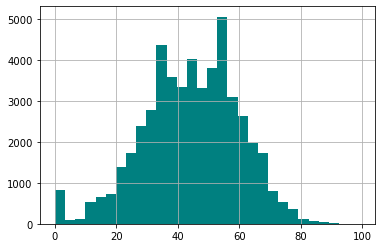

In [7]:
# these features will be used in classification stage
feature_names = ["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness",
           "loudness", "speechiness", "valence"]
feature_names

popularity = df.loc[:, "popularity"]
popularity.hist(bins=30, color='#008080')

<AxesSubplot:>

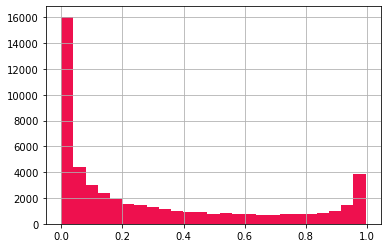

In [8]:
acousticness = df.loc[:, "acousticness"]
acousticness.hist(bins=25,color='#ee104e')

<AxesSubplot:>

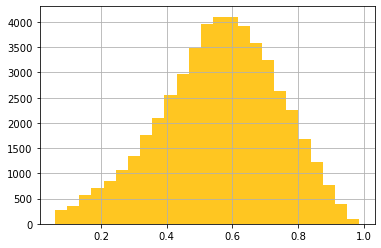

In [9]:
danceability = df.loc[:, "danceability"]
danceability.hist(bins=25,color='#ffc621')

<AxesSubplot:>

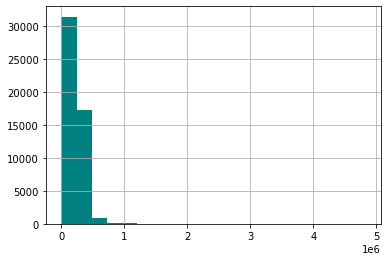

In [10]:
duration_ms = df.loc[:, "duration_ms"]
duration_ms.hist(bins=20 ,color='#008080')

<AxesSubplot:>

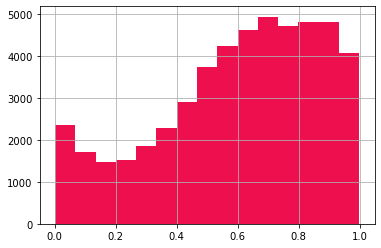

In [11]:
energy = df.loc[:, "energy"]
energy.hist(bins=15,color='#ee104e')

<AxesSubplot:>

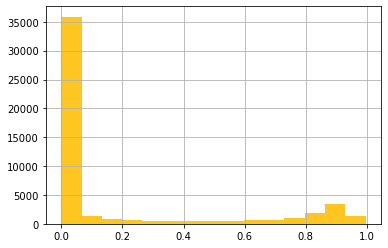

In [12]:
instrumentalness = df.loc[:, "instrumentalness"]
instrumentalness.hist(bins=15,color='#ffc621')

<AxesSubplot:>

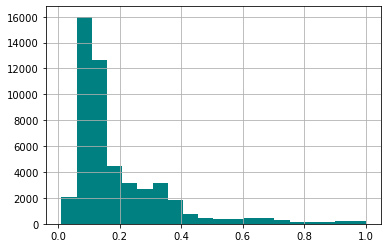

In [13]:
liveness = df.loc[:, "liveness"]
liveness.hist(bins=20 ,color='#008080')

<AxesSubplot:>

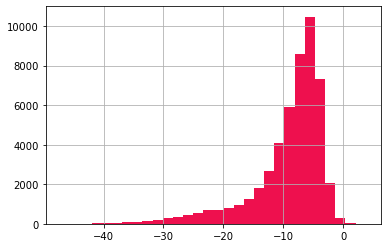

In [14]:
loudness = df.loc[:, "loudness"]
loudness.hist(bins=30,color='#ee104e')

<AxesSubplot:>

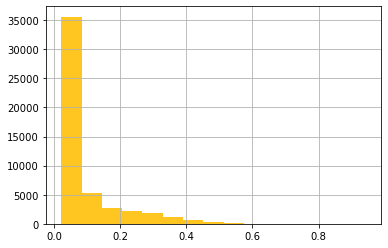

In [15]:
speechiness = df.loc[:, "speechiness"]
speechiness.hist(bins=15,color='#ffc621')

<AxesSubplot:>

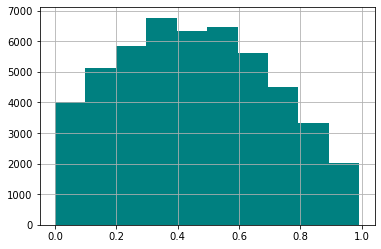

In [16]:
valence = df.loc[:, "valence"]
valence.hist(bins=10 ,color='#008080')

In [17]:
# shuffle the data
df = shuffle(df)

In [18]:
# music classes
music_classes = df.loc[:, "music_genre"].unique()
print(music_classes)

['Anime' 'Rap' 'Hip-Hop' 'Country' 'Electronic' 'Alternative' 'Classical'
 'Jazz' 'Rock' 'Blues']


In [19]:
# describe each column and convert them into numerical form
for feature_name in feature_names:
    print("Feature Name: {}".format(feature_name))
    print(df.loc[:, feature_name].describe())
    print("---------------------------")

Feature Name: popularity
count    50000.000000
mean        44.220420
std         15.542008
min          0.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: popularity, dtype: float64
---------------------------
Feature Name: acousticness
count    50000.000000
mean         0.306383
std          0.341340
min          0.000000
25%          0.020000
50%          0.144000
75%          0.552000
max          0.996000
Name: acousticness, dtype: float64
---------------------------
Feature Name: danceability
count    50000.000000
mean         0.558241
std          0.178632
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64
---------------------------
Feature Name: duration_ms
count    5.000000e+04
mean     2.212526e+05
std      1.286720e+05
min     -1.000000e+00
25%      1.748000e+05
50%      2.192810e+05
75%      2.686122e+05
max      4.830606e+06
Name

In [20]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5835,26315.0,Mrs. GREEN APPLE,FACTORY,32.0,0.05090,0.607,212747.0,0.713,0.000022,A#,0.0919,-5.040,Major,0.0378,?,4-Apr,0.708,Anime
25343,90256.0,YG,HANDGUN (feat. A$AP Rocky),65.0,0.01950,0.843,215533.0,0.546,0.000000,G#,0.3740,-7.714,Major,0.4640,?,4-Apr,0.427,Rap
47524,67898.0,Yung Pinch,Look Like,65.0,0.02490,0.806,226154.0,0.523,0.006980,E,0.1100,-7.623,Major,0.0972,?,4-Apr,0.620,Hip-Hop
7529,44561.0,ROOKiEZ is PUNK'D,self hate,21.0,0.00685,0.535,275893.0,0.925,0.000000,A,0.2320,-3.572,Major,0.0580,126.00299999999999,4-Apr,0.451,Anime
22779,86543.0,Rascal Flatts,Bless the Broken Road - Acoustic,51.0,0.74200,0.603,234080.0,0.360,0.000000,C,0.2330,-8.841,Major,0.0309,122.021,4-Apr,0.347,Country


In [21]:
# normalize each column between [0,1]

# normalizer
min_max_scaler = preprocessing.MinMaxScaler()

for feature_name in feature_names:
    x = df.loc[:, feature_name].values
    
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
    
    df[feature_name+"_normalized"] = x_scaled

In [22]:
# get the all features for training and labels
df_x = df.iloc[:, -10:]

print(df_x.head())

# this X will be used for training 
X = df_x.values

print("---------------------------------------------")

print(X.shape)

sel = VarianceThreshold(threshold=(0.001))
sel.fit_transform(X)

X = sel.fit_transform(X)

print(X.shape)


print("---------------------------------------------")

       popularity_normalized  acousticness_normalized  \
5835                0.323232                 0.051104   
25343               0.656566                 0.019578   
47524               0.656566                 0.025000   
7529                0.212121                 0.006878   
22779               0.515152                 0.744980   

       danceability_normalized  duration_ms_normalized  energy_normalized  \
5835                  0.590889                0.044042           0.713487   
25343                 0.845639                0.044618           0.546187   
47524                 0.805699                0.046817           0.523145   
7529                  0.513169                0.057114           0.925867   
22779                 0.586572                0.048458           0.359853   

       instrumentalness_normalized  liveness_normalized  loudness_normalized  \
5835                      0.000022             0.083033             0.827053   
25343                     0.000000

In [23]:
# labels
df_y = df.loc[:, "music_genre"].values

# encode each label to the integer value
# ex; Blues --> 0 etc. 
le = preprocessing.LabelEncoder()
y = le.fit_transform(df_y)
y_text = df_y.tolist()

print(y)
print(y.shape)
for value in list(set(y)):
    print("{} --> {}".format(value, le.inverse_transform([value])))




[1 8 6 ... 2 1 3]
(50000,)
0 --> ['Alternative']
1 --> ['Anime']
2 --> ['Blues']
3 --> ['Classical']
4 --> ['Country']
5 --> ['Electronic']
6 --> ['Hip-Hop']
7 --> ['Jazz']
8 --> ['Rap']
9 --> ['Rock']


In [24]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_text, test_size=0.15, random_state=42) 

In [25]:
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(42500, 9) (7500, 9) 42500 7500


In [26]:
# Model training
################
print("SVM Model is starting")
svm_model = SVC(kernel='poly', degree=4).fit(X_train, y_train)
print("Logistic Regression Model is starting")
logistic_model = LogisticRegression().fit(X_train, y_train)
print("ANN Model is starting")
mlp_model = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5).fit(X_train, y_train)

SVM Model is starting
Logistic Regression Model is starting
ANN Model is starting


In [27]:
# Test loss with confusion matrix
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = logistic_model.predict(X_test)
y_pred_ann = mlp_model.predict(X_test)

In [28]:
y_pred_svm 

array(['Blues', 'Classical', 'Country', ..., 'Jazz', 'Rock', 'Rock'],
      dtype='<U11')

In [29]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    import numpy as np

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


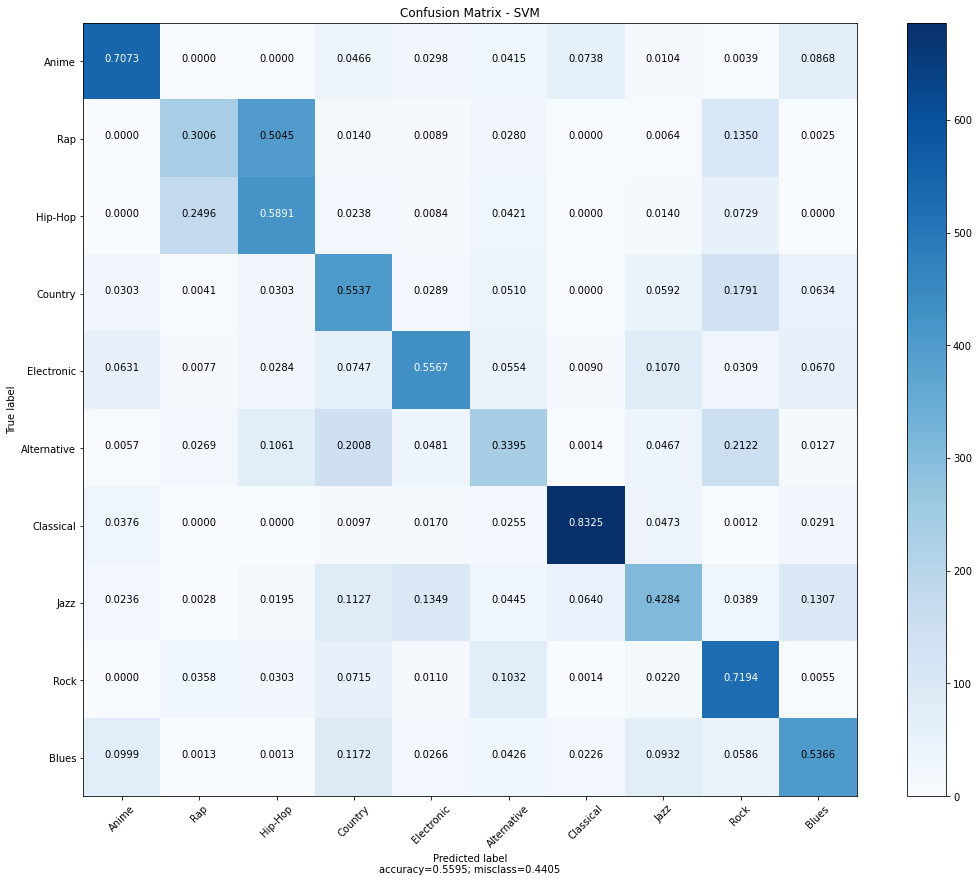

              precision    recall  f1-score   support

       Anime       0.73      0.71      0.72       772
         Rap       0.50      0.30      0.38       785
     Hip-Hop       0.43      0.59      0.50       713
     Country       0.45      0.55      0.50       726
  Electronic       0.65      0.56      0.60       776
 Alternative       0.43      0.34      0.38       707
   Classical       0.84      0.83      0.84       824
        Jazz       0.50      0.43      0.46       719
        Rock       0.49      0.72      0.59       727
       Blues       0.57      0.54      0.56       751

    accuracy                           0.56      7500
   macro avg       0.56      0.56      0.55      7500
weighted avg       0.57      0.56      0.56      7500



In [30]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=list(music_classes))
plot_confusion_matrix(cm_svm, list(music_classes), "Confusion Matrix - SVM")

print(classification_report(y_test, y_pred_svm, labels=list(music_classes)))

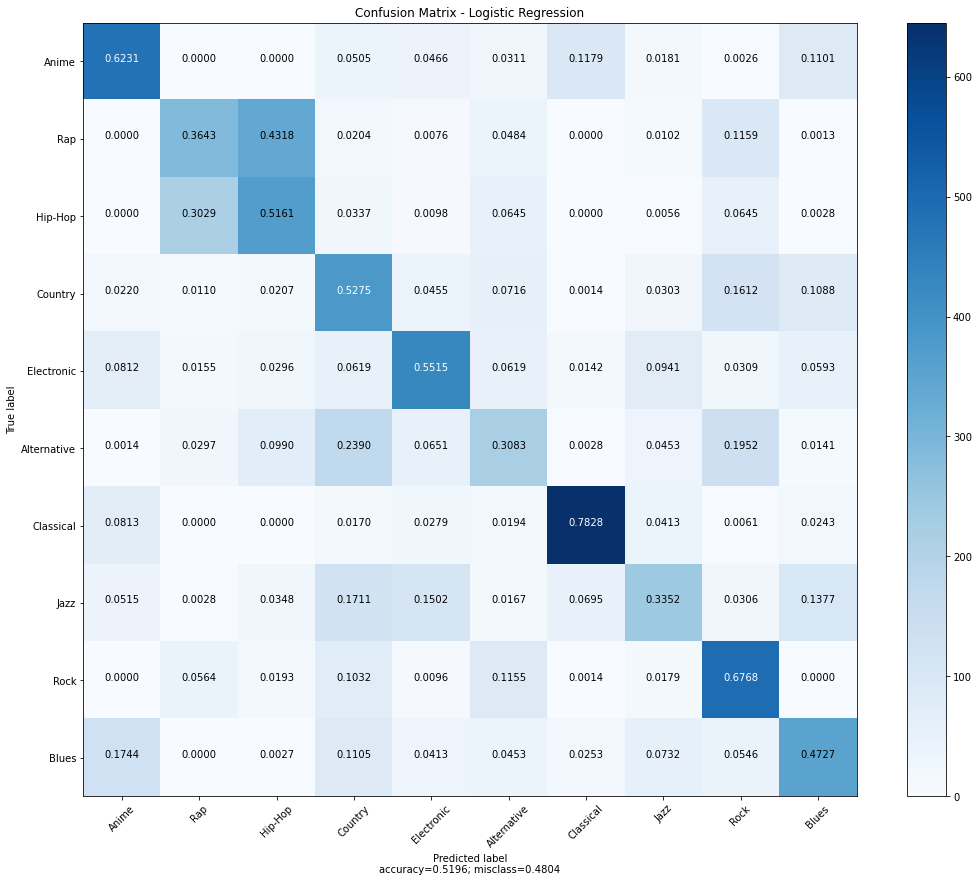

              precision    recall  f1-score   support

       Anime       0.60      0.62      0.61       772
         Rap       0.49      0.36      0.42       785
     Hip-Hop       0.43      0.52      0.47       713
     Country       0.39      0.53      0.45       726
  Electronic       0.59      0.55      0.57       776
 Alternative       0.38      0.31      0.34       707
   Classical       0.79      0.78      0.78       824
        Jazz       0.49      0.34      0.40       719
        Rock       0.50      0.68      0.58       727
       Blues       0.51      0.47      0.49       751

    accuracy                           0.52      7500
   macro avg       0.52      0.52      0.51      7500
weighted avg       0.52      0.52      0.52      7500



In [31]:
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=list(music_classes))
plot_confusion_matrix(cm_lr, list(music_classes), "Confusion Matrix - Logistic Regression")

print(classification_report(y_test, y_pred_lr, labels=list(music_classes)))

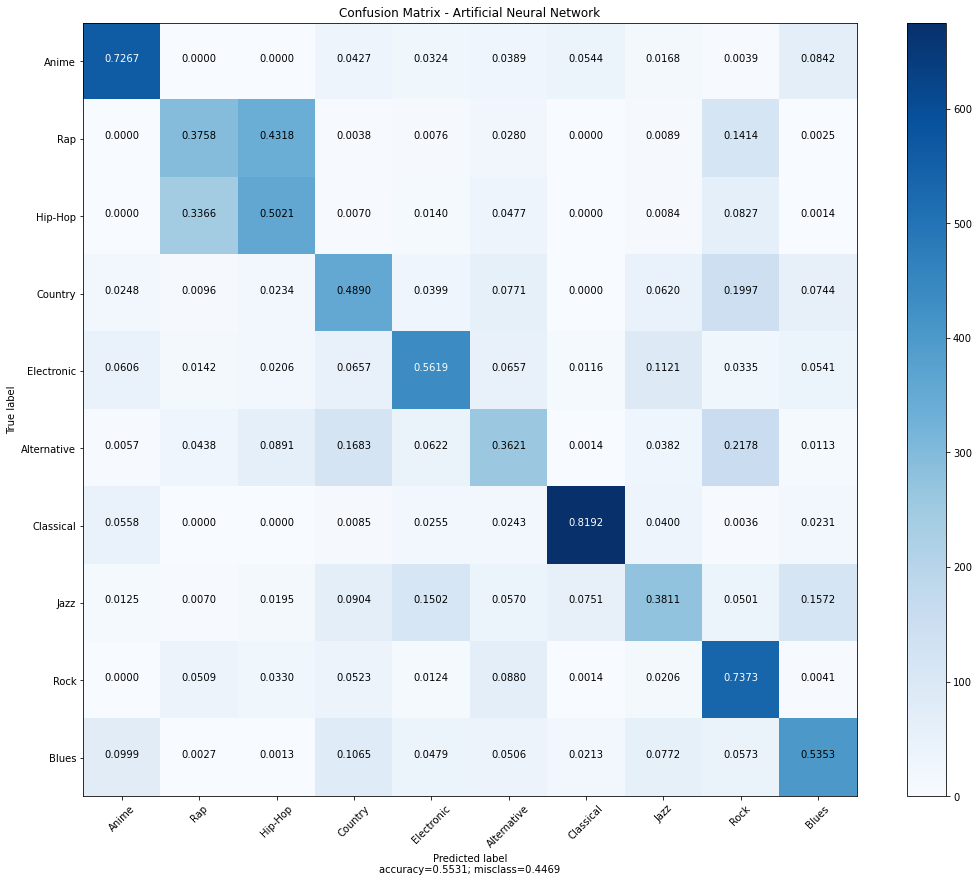

              precision    recall  f1-score   support

       Anime       0.74      0.73      0.73       772
         Rap       0.47      0.38      0.42       785
     Hip-Hop       0.43      0.50      0.46       713
     Country       0.47      0.49      0.48       726
  Electronic       0.60      0.56      0.58       776
 Alternative       0.42      0.36      0.39       707
   Classical       0.85      0.82      0.83       824
        Jazz       0.48      0.38      0.43       719
        Rock       0.48      0.74      0.58       727
       Blues       0.57      0.54      0.55       751

    accuracy                           0.55      7500
   macro avg       0.55      0.55      0.55      7500
weighted avg       0.56      0.55      0.55      7500



In [32]:
cm_ann = confusion_matrix(y_test, y_pred_ann, labels=list(music_classes))
plot_confusion_matrix(cm_ann, list(music_classes), "Confusion Matrix - Artificial Neural Network")

print(classification_report(y_test, y_pred_ann, labels=list(music_classes)))